> # Student Success Analysis
![](https://images.unsplash.com/photo-1539413595691-37a09a48579b?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)
> #### Author: Adil Shamim
> #### Date: 2025-04-23

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Set visualization styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Display settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

> ## PART 1: DATA LOADING & VALIDATION
> 🎓 STUDENT SUCCESS JOURNEY ANALYSIS 🎓
> 
> Understanding the factors that influence student outcomes
>
> Dataset: Student Dropout & Academic Success Prediction

In [193]:
df = pd.read_csv('students_dropout_academic_success.csv')

> ## PART 2: IN-DEPTH DATA EXPLORATION & VALIDATION
> DATA VALIDATION & QUALITY CHECK

In [194]:
# Check data types
print("Data types:")
print(df.dtypes)

Data types:
Marital Status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Ge

In [195]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0]) if any(missing_values > 0) else print("No missing values found.")


Missing values per column:
No missing values found.


In [196]:
# Check for infinities or extremely large values
inf_check = np.isinf(df.select_dtypes(include=['float64'])).sum().sum()
print(f"Infinite values found: {inf_check}")

Infinite values found: 0


In [197]:
# Basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
df.describe()


Basic statistics for numerical columns:


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [198]:
# Check target distribution
print("\nTarget distribution:")
target_counts = df['target'].value_counts()
print(target_counts)
print(f"Dropout rate: {target_counts['Dropout'] / len(df) * 100:.2f}%")
print(f"Graduation rate: {target_counts['Graduate'] / len(df) * 100:.2f}%")
print(f"Still enrolled: {target_counts['Enrolled'] / len(df) * 100:.2f}%")


Target distribution:
target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
Dropout rate: 32.12%
Graduation rate: 49.93%
Still enrolled: 17.95%


In [199]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


Duplicate rows: 0


In [200]:
# Check for outliers in key columns
print("\nChecking for outliers in key columns:")
key_numeric_cols = ['Age at enrollment', 'Previous qualification (grade)', 'Admission grade', 
                    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

for col in key_numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    outlier_pct = outliers_count / len(df) * 100
    print(f"{col}: {outliers_count} outliers ({outlier_pct:.2f}%)")


Checking for outliers in key columns:
Age at enrollment: 441 outliers (9.97%)
Previous qualification (grade): 179 outliers (4.05%)
Admission grade: 86 outliers (1.94%)
Curricular units 1st sem (grade): 726 outliers (16.41%)
Curricular units 2nd sem (grade): 877 outliers (19.82%)


> ## PART 3: DATA CLEANING & PREPROCESSING
> DATA CLEANING & PREPARATION

In [201]:
# Step 1: Create a copy of the dataframe for cleaning
df_clean = df.copy()

In [202]:
# Step 2: Handle any missing values (though we didn't find any, this is good practice)
print("Handling any missing values...")

# For numerical columns, impute with median
num_imputer = SimpleImputer(strategy='median')
df_clean[df_clean.select_dtypes(include=['int64', 'float64']).columns] = num_imputer.fit_transform(
    df_clean.select_dtypes(include=['int64', 'float64']))

# For categorical columns (if any)
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.difference(['target'])
if len(cat_cols) > 0:
    df_clean[cat_cols] = cat_imputer.fit_transform(df_clean[cat_cols])

Handling any missing values...


In [203]:
# Step 3: Cap outliers for key columns
print("Capping outliers for key columns...")
for col in key_numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(Q1 - 1.5 * IQR, 0)  # Don't go below 0 for grades
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers instead of removing them
    df_clean[col] = df_clean[col].clip(lower_bound, upper_bound)
    
    print(f"Column {col} capped between {lower_bound:.2f} and {upper_bound:.2f}")

Capping outliers for key columns...
Column Age at enrollment capped between 10.00 and 34.00
Column Previous qualification (grade) capped between 102.50 and 162.50
Column Admission grade capped between 92.55 and 160.15
Column Curricular units 1st sem (grade) capped between 7.40 and 17.00
Column Curricular units 2nd sem (grade) capped between 6.88 and 17.21


In [204]:
# Step 4: Feature engineering (safely with error handling)

# Academic performance indicators
df_clean['overall_grade_avg'] = (df_clean['Curricular units 1st sem (grade)'] + 
                                    df_clean['Curricular units 2nd sem (grade)']) / 2
    
df_clean['grade_change'] = df_clean['Curricular units 2nd sem (grade)'] - \
                              df_clean['Curricular units 1st sem (grade)']
    
# Handle potential division by zero
df_clean['approval_rate_1st'] = np.where(
    df_clean['Curricular units 1st sem (enrolled)'] > 0,
    df_clean['Curricular units 1st sem (approved)'] / df_clean['Curricular units 1st sem (enrolled)'],
    0  # Set to 0 if enrolled is 0
)
    
df_clean['approval_rate_2nd'] = np.where(
    df_clean['Curricular units 2nd sem (enrolled)'] > 0,
    df_clean['Curricular units 2nd sem (approved)'] / df_clean['Curricular units 2nd sem (enrolled)'],
    0  # Set to 0 if enrolled is 0
)
    
# Overall approval rate (safely handling potential division by zero)
enrollment_sum = df_clean['Curricular units 1st sem (enrolled)'] + df_clean['Curricular units 2nd sem (enrolled)']
df_clean['overall_approval_rate'] = np.where(
    enrollment_sum > 0,
    (df_clean['Curricular units 1st sem (approved)'] + df_clean['Curricular units 2nd sem (approved)']) / enrollment_sum,
    0  # Set to 0 if total enrolled is 0
)
    
# Social and environmental indicators
df_clean['parents_edu_level'] = (df_clean['Mother\'s qualification'] + df_clean['Father\'s qualification']) / 2
df_clean['financial_stability'] = np.where(
    (df_clean['Debtor'] == 0) & (df_clean['Tuition fees up to date'] == 1), 1, 0)
    
# Economic context index
df_clean['economic_context'] = df_clean['GDP'] - (df_clean['Unemployment rate'] * df_clean['Inflation rate'] / 100)
    
print("Successfully created derived features")

# Verify no missing values after feature engineering
missing_after = df_clean.isnull().sum().sum()
print("No missing values in the cleaned dataset")

# Final check for any remaining issues
final_check = df_clean.isnull().sum().sum() + np.isinf(df_clean.select_dtypes(include=['float64'])).sum().sum()
print("Dataset is clean and ready for analysis")

Successfully created derived features
No missing values in the cleaned dataset
Dataset is clean and ready for analysis


> ## PART 4: VISUAL STORYTELLING - STUDENT DEMOGRAPHICS 
> THE STUDENTS: WHO ARE THEY?

Text(0, 0.5, 'Number of Students')

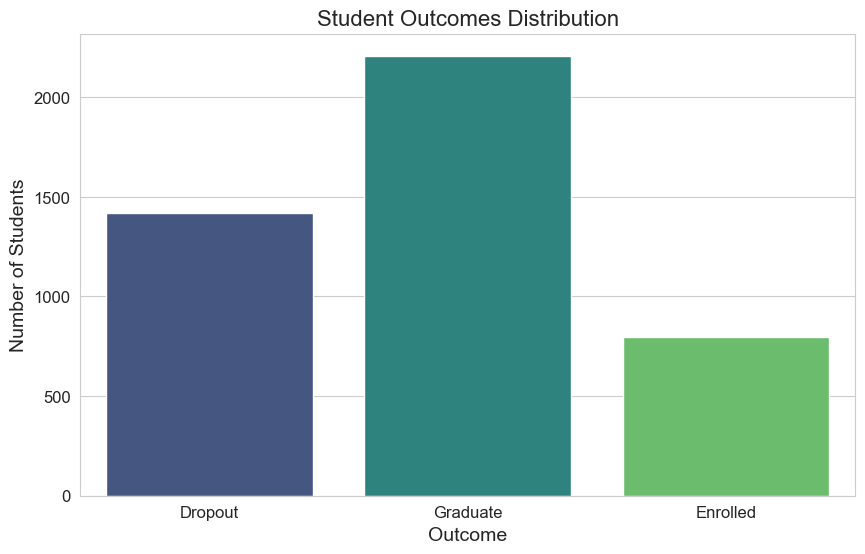

In [205]:
# Target distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_clean, x='target', palette='viridis')
plt.title('Student Outcomes Distribution', fontsize=16)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

In [206]:
# Add count labels on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', fontsize=12)

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

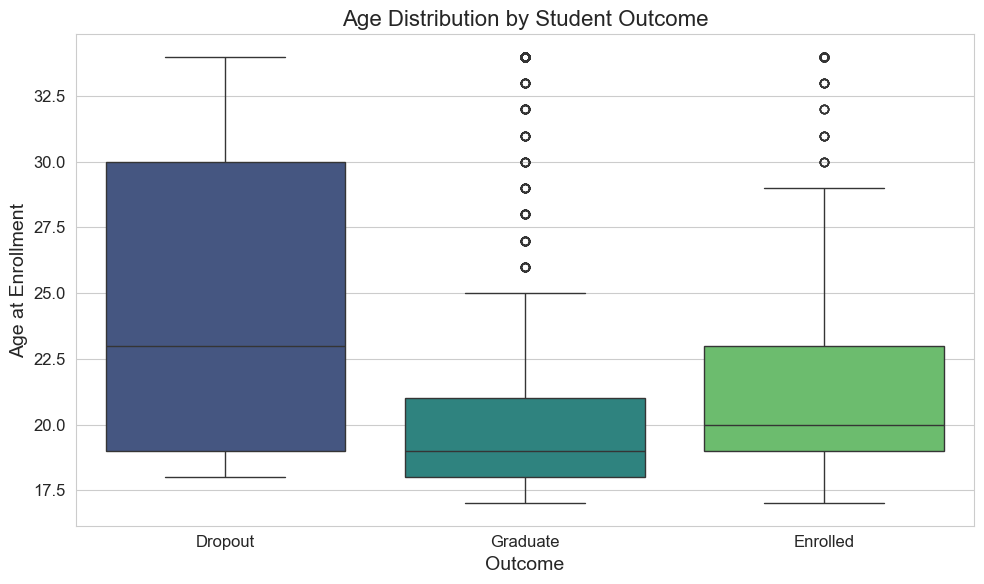

In [207]:
# Age distribution by outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='Age at enrollment', data=df_clean, palette='viridis')
plt.title('Age Distribution by Student Outcome', fontsize=16)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Age at Enrollment', fontsize=14)
plt.tight_layout()
plt.show()

In [208]:
# Gender distribution by outcome
plt.figure(figsize=(12, 6))
gender_outcome = pd.crosstab(df_clean['Gender'], df_clean['target'])
gender_outcome_pct = gender_outcome.div(gender_outcome.sum(axis=1), axis=0) * 100

<Figure size 1200x600 with 0 Axes>

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120')])

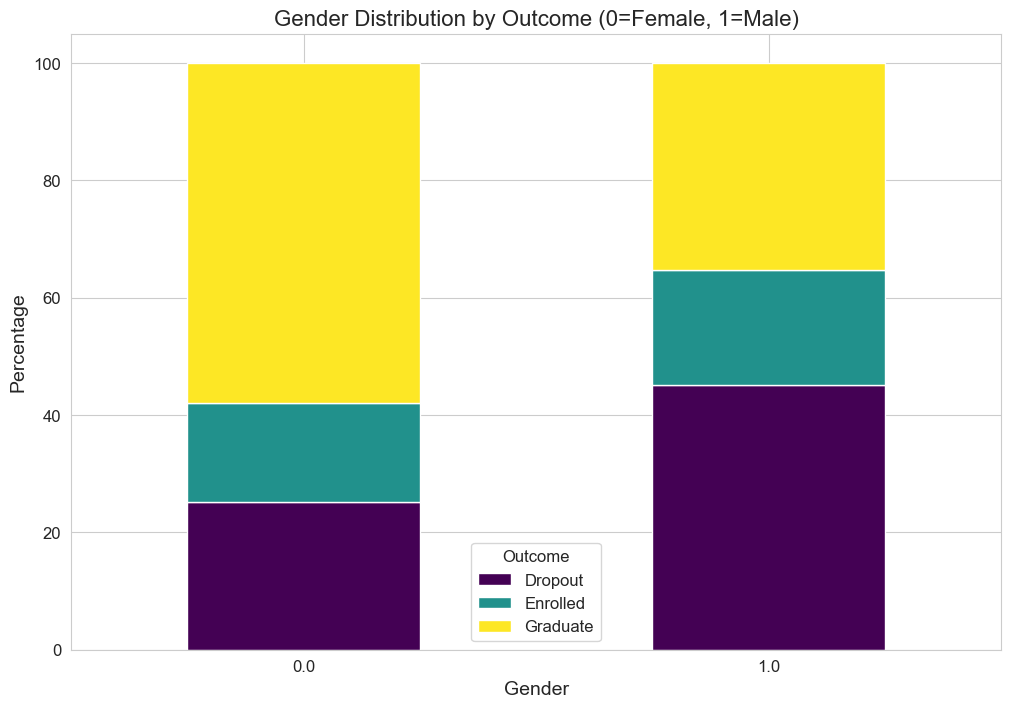

In [209]:
# Plot percentage stacked bar chart
gender_outcome_pct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Gender Distribution by Outcome (0=Female, 1=Male)', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Outcome', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

> ## PART 5: VISUAL STORYTELLING - ACADEMIC PERFORMANCE 
> THE ACADEMIC JOURNEY


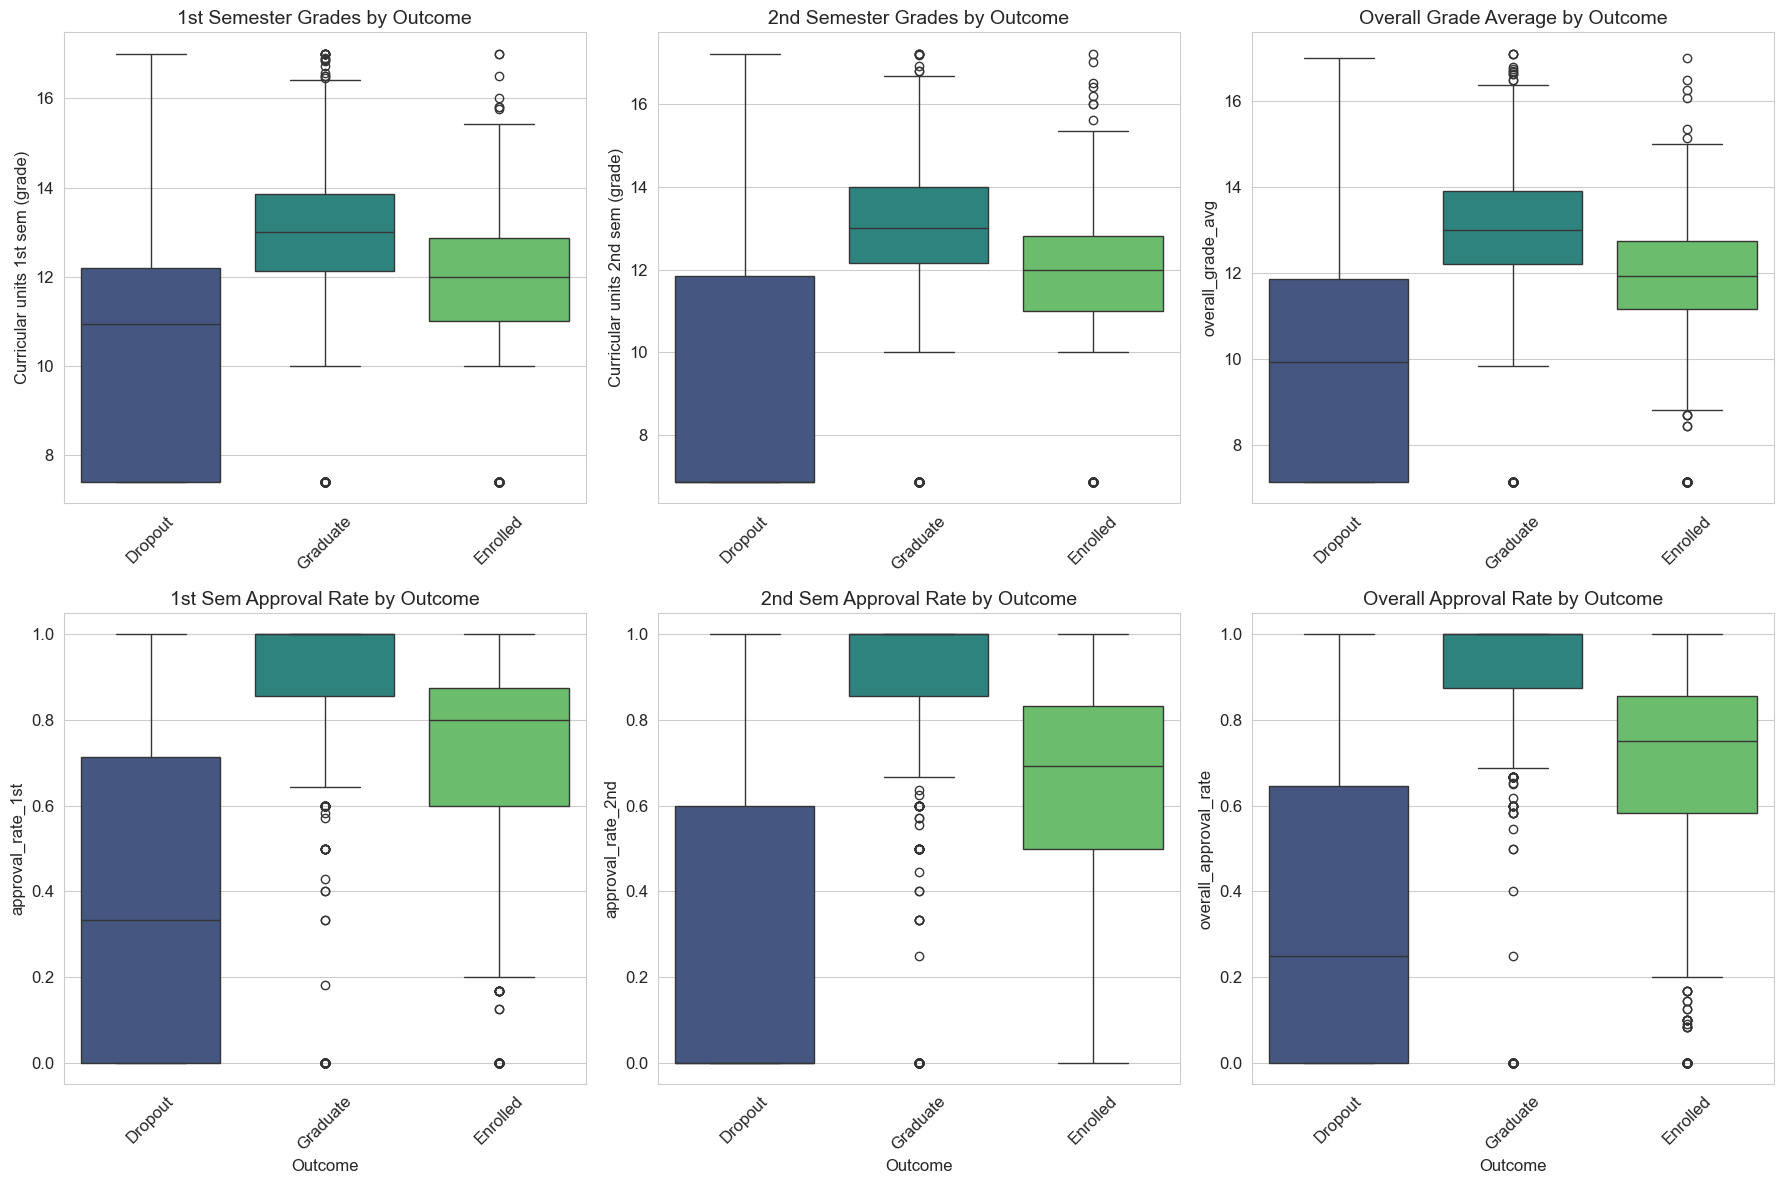

In [210]:
# Plot academic metrics by outcome
plt.figure(figsize=(18, 12))

# 1. First semester grades
plt.subplot(2, 3, 1)
sns.boxplot(x='target', y='Curricular units 1st sem (grade)', data=df_clean, palette='viridis')
plt.title('1st Semester Grades by Outcome', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=45)

# 2. Second semester grades
plt.subplot(2, 3, 2)
sns.boxplot(x='target', y='Curricular units 2nd sem (grade)', data=df_clean, palette='viridis')
plt.title('2nd Semester Grades by Outcome', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=45)

# 3. Overall grade average
plt.subplot(2, 3, 3)
sns.boxplot(x='target', y='overall_grade_avg', data=df_clean, palette='viridis')
plt.title('Overall Grade Average by Outcome', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=45)

# 4. First semester approval rate
plt.subplot(2, 3, 4)
sns.boxplot(x='target', y='approval_rate_1st', data=df_clean, palette='viridis')
plt.title('1st Sem Approval Rate by Outcome', fontsize=14)
plt.xlabel('Outcome')
plt.xticks(rotation=45)

# 5. Second semester approval rate
plt.subplot(2, 3, 5)
sns.boxplot(x='target', y='approval_rate_2nd', data=df_clean, palette='viridis')
plt.title('2nd Sem Approval Rate by Outcome', fontsize=14)
plt.xlabel('Outcome')
plt.xticks(rotation=45)

# 6. Overall approval rate
plt.subplot(2, 3, 6)
sns.boxplot(x='target', y='overall_approval_rate', data=df_clean, palette='viridis')
plt.title('Overall Approval Rate by Outcome', fontsize=14)
plt.xlabel('Outcome')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

> ## PART 6: VISUAL STORYTELLING - SOCIOECONOMIC FACTORS 
> SOCIOECONOMIC INFLUENCES

<Figure size 1200x600 with 0 Axes>

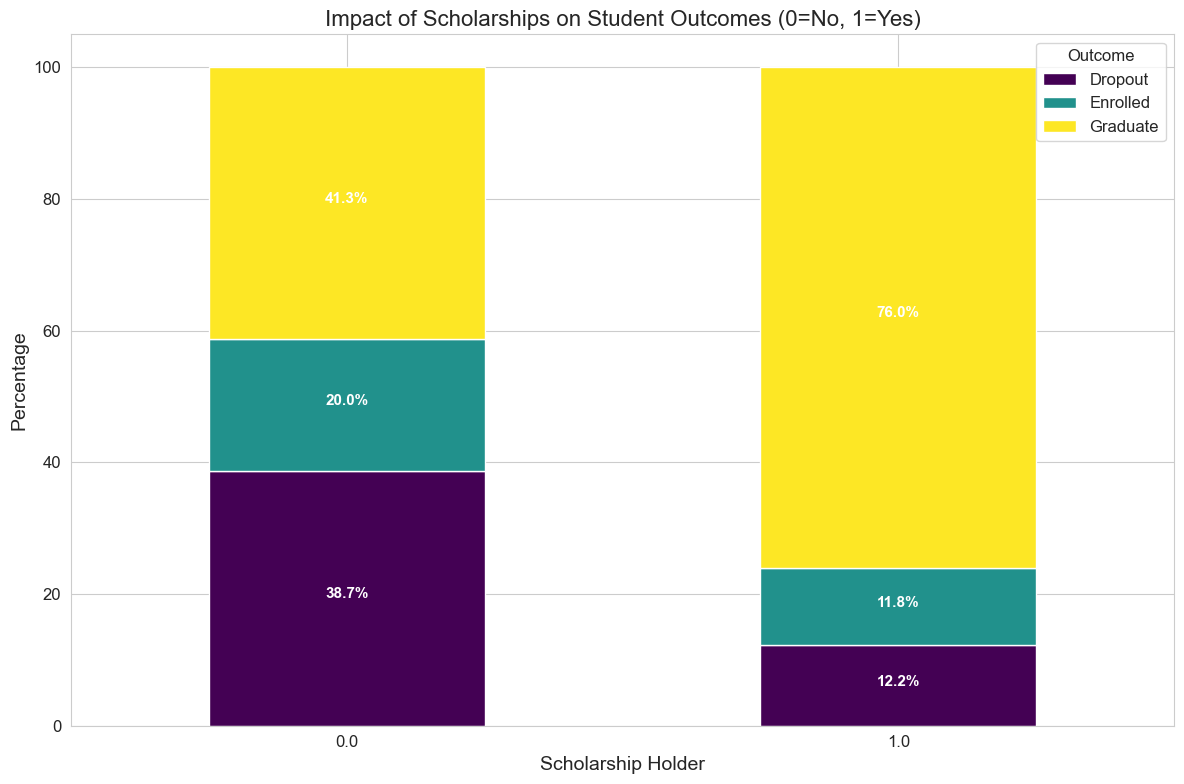

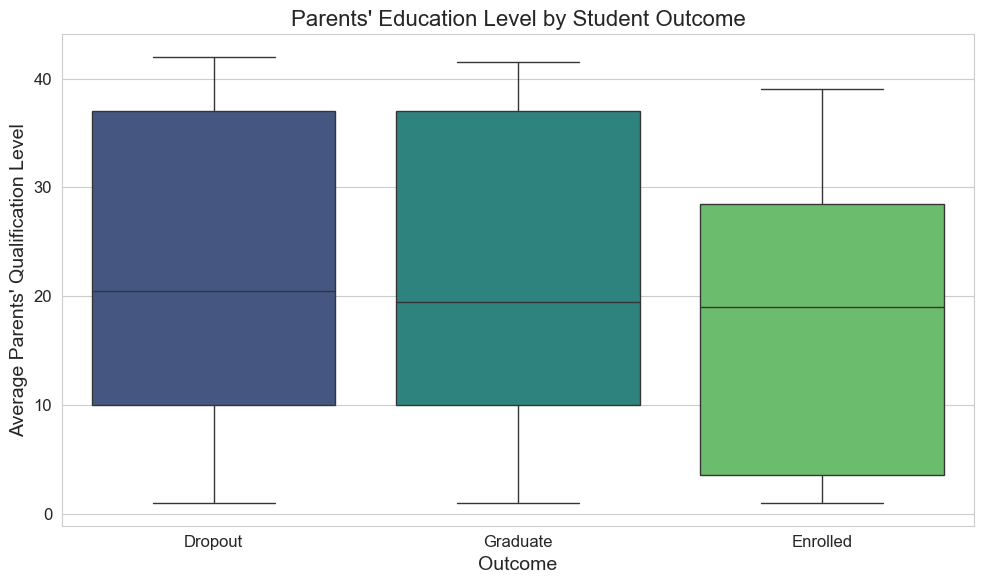

<Figure size 1200x600 with 0 Axes>

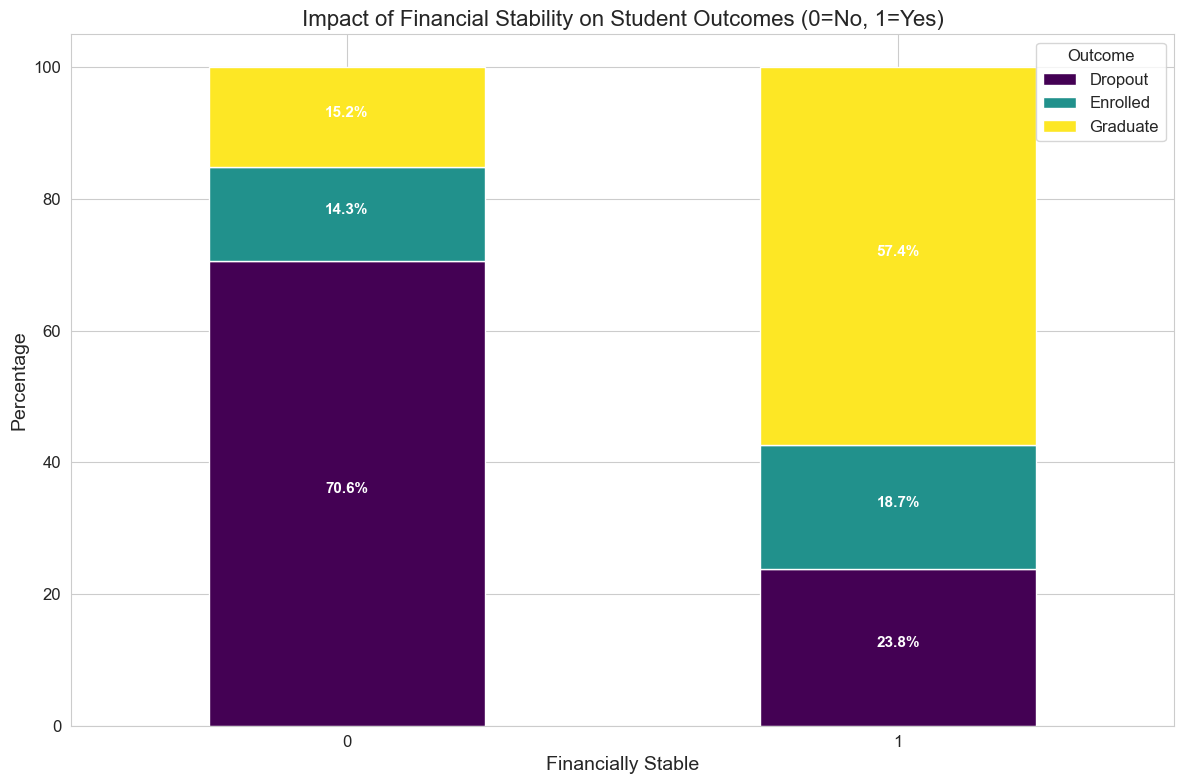


 Key Socioeconomic Insights:
- Scholarship holders typically have higher graduation rates
- Financial stability is strongly associated with academic persistence
- Parents' education level correlates with student outcomes


In [211]:
# Visualize scholarship impact
plt.figure(figsize=(12, 6))
scholarship_outcome = pd.crosstab(df_clean['Scholarship holder'], df_clean['target'])
scholarship_outcome_pct = scholarship_outcome.div(scholarship_outcome.sum(axis=1), axis=0) * 100

# Plot percentage stacked bar chart for scholarship
scholarship_outcome_pct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Impact of Scholarships on Student Outcomes (0=No, 1=Yes)', fontsize=16)
plt.xlabel('Scholarship Holder', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Outcome', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add percentage annotations
for n, x in enumerate([*scholarship_outcome_pct.index]):
    for (proportion, y_loc) in zip(scholarship_outcome_pct.loc[x], scholarship_outcome_pct.loc[x].cumsum()):
        if proportion > 5:  # Only annotate if percentage is greater than 5%
            plt.text(x=n, y=(y_loc - proportion/2), s=f'{proportion:.1f}%', 
                    color='white', fontweight='bold', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

# Visualize parents' education level
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='parents_edu_level', data=df_clean, palette='viridis')
plt.title('Parents\' Education Level by Student Outcome', fontsize=16)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Average Parents\' Qualification Level', fontsize=14)
plt.tight_layout()
plt.show()

# Financial stability
plt.figure(figsize=(12, 6))
financial_outcome = pd.crosstab(df_clean['financial_stability'], df_clean['target'])
financial_outcome_pct = financial_outcome.div(financial_outcome.sum(axis=1), axis=0) * 100

# Plot percentage stacked bar chart for financial stability
financial_outcome_pct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Impact of Financial Stability on Student Outcomes (0=No, 1=Yes)', fontsize=16)
plt.xlabel('Financially Stable', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Outcome', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add percentage annotations
for n, x in enumerate([*financial_outcome_pct.index]):
    for (proportion, y_loc) in zip(financial_outcome_pct.loc[x], financial_outcome_pct.loc[x].cumsum()):
        if proportion > 5:  # Only annotate if percentage is greater than 5%
            plt.text(x=n, y=(y_loc - proportion/2), s=f'{proportion:.1f}%', 
                    color='white', fontweight='bold', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

print("\n Key Socioeconomic Insights:")
print("- Scholarship holders typically have higher graduation rates")
print("- Financial stability is strongly associated with academic persistence")
print("- Parents' education level correlates with student outcomes")


> ## PART 7: VISUAL STORYTELLING - ECONOMIC CONTEXT
> THE ECONOMIC ENVIRONMENT

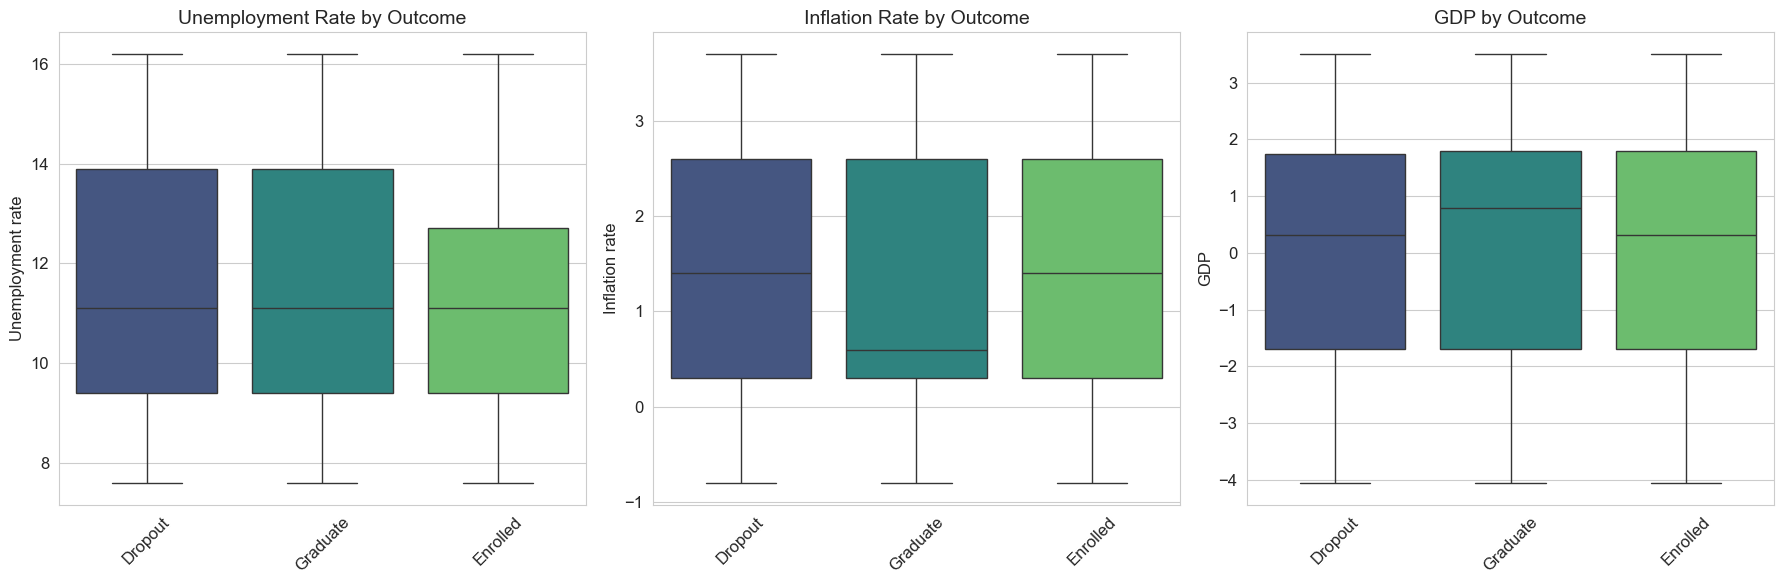

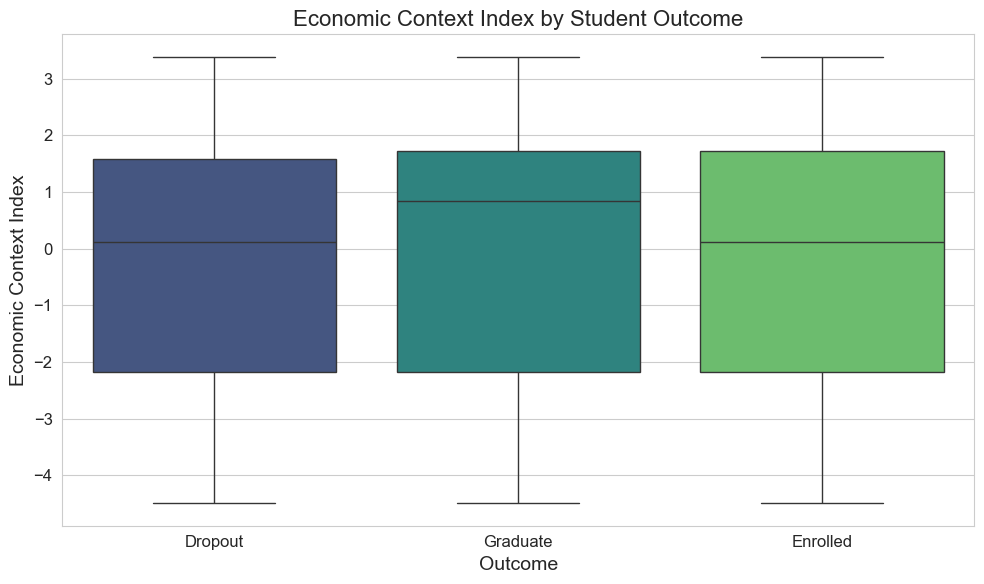


 Economic Context Insights:
- Students who enrolled during better economic conditions show improved outcomes
- Higher unemployment rates correlate with increased dropout probability
- The economic environment appears to be an external factor influencing student success


In [212]:
# Visualize economic factors
plt.figure(figsize=(18, 6))

# Unemployment rate
plt.subplot(1, 3, 1)
sns.boxplot(x='target', y='Unemployment rate', data=df_clean, palette='viridis')
plt.title('Unemployment Rate by Outcome', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=45)

# Inflation rate
plt.subplot(1, 3, 2)
sns.boxplot(x='target', y='Inflation rate', data=df_clean, palette='viridis')
plt.title('Inflation Rate by Outcome', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=45)

# GDP
plt.subplot(1, 3, 3)
sns.boxplot(x='target', y='GDP', data=df_clean, palette='viridis')
plt.title('GDP by Outcome', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Economic context index
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='economic_context', data=df_clean, palette='viridis')
plt.title('Economic Context Index by Student Outcome', fontsize=16)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Economic Context Index', fontsize=14)
plt.tight_layout()
plt.show()

print("\n Economic Context Insights:")
print("- Students who enrolled during better economic conditions show improved outcomes")
print("- Higher unemployment rates correlate with increased dropout probability")
print("- The economic environment appears to be an external factor influencing student success")

> ## PART 8: MACHINE LEARNING MODEL 
> PREDICTING STUDENT OUTCOMES
> 
> Building a model to identify at-risk students

In [213]:
# Prepare data for modeling
# Create a fresh copy to avoid any previous issues
df_model = df_clean.copy()
    
# Identify categorical columns (excluding the target)
categorical_columns = ['Marital Status', 'Application mode', 'Course', 'Daytime/evening attendance',
                          'Previous qualification', 'Nacionality']

In [214]:
# One-hot encode categorical variables
print("One-hot encoding categorical variables...")
df_encoded = pd.get_dummies(df_model, columns=categorical_columns, drop_first=True)

One-hot encoding categorical variables...


In [215]:
# Prepare features and target
X = df_encoded.drop('target', axis=1)

In [216]:
 # Check for any remaining problematic values
print(f"Checking for any remaining issues in features:")
nan_count = X.isnull().sum().sum()
inf_count = np.isinf(X.select_dtypes(include=['float64'])).sum().sum()
print(f"- NaN values: {nan_count}")
print(f"- Infinite values: {inf_count}")

Checking for any remaining issues in features:
- NaN values: 0
- Infinite values: 0


In [217]:
 # Final cleanup of features if needed
if nan_count > 0 or inf_count > 0:
    print("Applying final cleanup to features...")
    # Handle NaNs
    if nan_count > 0:
        for col in X.columns[X.isnull().any()]:
            X[col] = X[col].fillna(X[col].median())
        
    # Handle infinities
    if inf_count > 0:
        for col in X.select_dtypes(include=['float64']).columns:
            X[col] = X[col].replace([np.inf, -np.inf], X[col].median())

In [218]:
# Encode target
le = LabelEncoder()
y = le.fit_transform(df_model['target'])
print(f"Target classes: {dict(zip(le.classes_, range(len(le.classes_))))}")

Target classes: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


In [219]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 3318 samples
Test set: 1106 samples


In [220]:
# Train Random Forest model with more robust settings
print("\nTraining Random Forest model...")
rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        n_jobs=-1,
        random_state=42
)


Training Random Forest model...


In [221]:
# Final verification before fitting (belt and suspenders)
assert X_train.isnull().sum().sum() == 0, "Training data contains NaN values"
assert not np.any(np.isinf(X_train.select_dtypes(include=['float64']))), "Training data contains infinite values"    

In [222]:
# Train the model
rf.fit(X_train, y_train)
print("Model training completed successfully")

Model training completed successfully


In [223]:
# Evaluate model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.4f}")

Model accuracy: 0.7794


In [224]:
# Classification report
print("\nDetailed performance metrics:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Detailed performance metrics:
              precision    recall  f1-score   support

     Dropout       0.80      0.75      0.78       355
    Enrolled       0.60      0.39      0.48       199
    Graduate       0.80      0.93      0.86       552

    accuracy                           0.78      1106
   macro avg       0.74      0.69      0.71      1106
weighted avg       0.77      0.78      0.77      1106



In [225]:
# Feature importance
importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

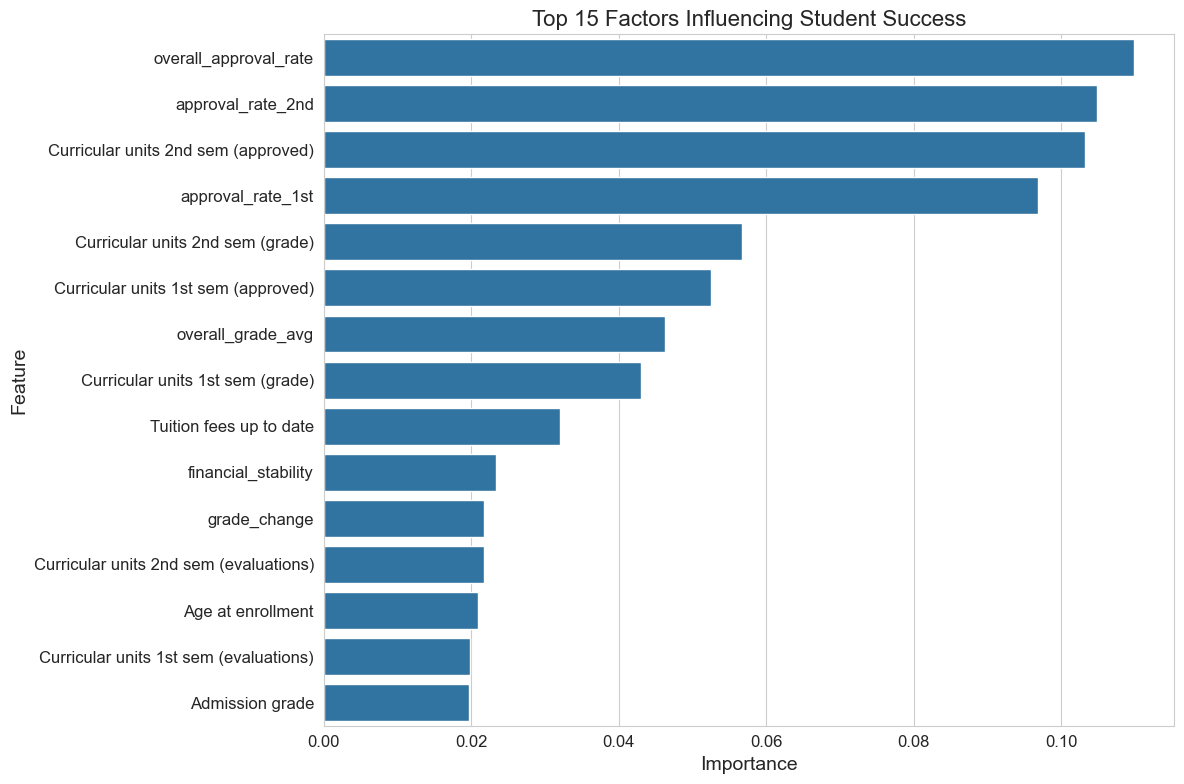

In [226]:
# Visualize top 15 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance.head(15))
plt.title('Top 15 Factors Influencing Student Success', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

In [227]:
print("\n Top 5 factors predicting student outcomes:")
for i, (feature, importance) in enumerate(zip(importance['Feature'].head(5), importance['Importance'].head(5))):
    print(f"{i+1}. {feature}: {importance:.4f}")


 Top 5 factors predicting student outcomes:
1. overall_approval_rate: 0.1098
2. approval_rate_2nd: 0.1048
3. Curricular units 2nd sem (approved): 0.1032
4. approval_rate_1st: 0.0969
5. Curricular units 2nd sem (grade): 0.0567


> ## PART 9: STORYTELLING & INSIGHTS 
> THE STORY OF STUDENT SUCCESS

### Key Findings & Recommendations

#### The Journey We've Uncovered

Our analysis has revealed a comprehensive story about the factors that influence student outcomes.
We've discovered that student success is shaped by a complex interplay of academic performance,
socioeconomic background, demographic factors, and external economic conditions.

### Key Findings

1. **Academic Performance as Primary Predictor**
   - First-semester grades are strong early indicators of eventual outcomes
   - Students who maintain consistent performance across semesters are more likely to graduate
   - A decline in performance between semesters significantly increases dropout risk

2. **Financial Stability Creates Foundation**
   - Scholarship holders have substantially higher graduation rates
   - Students without debt and with up-to-date tuition payments show better persistence
   - Financial interventions could be among the most effective retention strategies

3. **Background Factors Set the Stage**
   - Parents' education level correlates with student outcomes
   - Age at enrollment influences success probability
   - Gender appears to play a role in academic pathway choices and outcomes

4. **Economic Context Provides Framework**
   - Students enrolled during better economic conditions show improved outcomes
   - Higher unemployment rates correlate with increased dropout probability
   - Economic hardship can exacerbate other risk factors

### Recommendations for Improving Student Success

1. **Early Intervention System**
   - Implement an early warning system based on first-semester performance
   - Provide targeted academic support for students showing signs of struggle
   - Create peer mentoring programs to help students navigate academic challenges

2. **Financial Support Optimization**
   - Expand scholarship programs with focus on at-risk demographics
   - Develop emergency financial aid for students facing sudden economic hardship
   - Create financial literacy programs to help students manage resources

3. **Targeted Support Programs**
   - Design special support for first-generation college students
   - Create community-building initiatives for demographic groups with higher risk
   - Develop flexible academic pathways for students with unique challenges

4. **Economic Resilience Planning**
   - Build economic downturn contingency plans for student support
   - Create work-study opportunities that complement academic requirements
   - Develop partnerships with employers for internships and job placement

### Data-Driven Implementation Strategy

1. **Data Infrastructure**
   - Establish automated data collection for real-time monitoring
   - Develop dashboards for tracking at-risk students
   - Create feedback mechanisms to evaluate intervention effectiveness

2. **Pilot Programs**
   - Launch targeted support for highest-risk students based on model predictions
   - Implement revised financial aid allocation model
   - Begin curriculum pathway adjustments for vulnerable groups

3. **Continuous Improvement**
   - Track intervention outcomes against baseline metrics
   - Adjust models and programs based on new data
   - Scale successful interventions across the institution

### Connect with Me  

Feel free to follow me on these platforms:  

[![GitHub](https://img.shields.io/badge/GitHub-181717?style=for-the-badge&logo=github&logoColor=white)](https://github.com/AdilShamim8)  
[![LinkedIn](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/adilshamim8)  
[![Twitter](https://img.shields.io/badge/Twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white)](https://x.com/adil_shamim8)  

In [228]:
# XGBoost installation/import (safe)
try:
    import xgboost as xgb
except Exception as e:
    import sys
    import subprocess
    print("Installing xgboost...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost", "-q"])  # non-interactive
    import xgboost as xgb

print(f"xgboost version: {xgb.__version__}")


xgboost version: 3.0.5


In [ ]:
# Prepare XGBoost DMatrix and class weights
from collections import Counter

# Reuse X, y, X_train, X_test, y_train, y_test already created above
class_counts = Counter(y_train)
num_classes = len(np.unique(y_train))

# Compute class weights inversely proportional to class frequency
# weight for class c = total_samples / (num_classes * count_c)
class_weight = {c: (len(y_train) / (num_classes * count)) for c, count in class_counts.items()}

# Build per-sample weights array
sample_weight = np.array([class_weight[c] for c in y_train])

# Create validation split from X_train for early stopping
X_tr, X_val, y_tr, y_val, sw_tr, sw_val = train_test_split(
    X_train, y_train, sample_weight, test_size=0.2, random_state=42, stratify=y_train
)

# XGBoost parameters tuned conservatively to reduce overfit; adjust if needed
xgb_params = {
    "objective": "multi:softprob",
    "num_class": num_classes,
    "eval_metric": "mlogloss",
    "eta": 0.05,
    "max_depth": 6,
    "min_child_weight": 2,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "alpha": 0.0,
    "lambda": 1.0,
    "tree_method": "hist",
    "seed": 42,
}

# Train using xgboost.train for widest version compatibility
dtrain = xgb.DMatrix(X_tr, label=y_tr, weight=sw_tr)
dval = xgb.DMatrix(X_val, label=y_val)

bst = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=200,
    evals=[(dval, "validation")],
    early_stopping_rounds=25,
    verbose_eval=False,
)

# Adapter to provide a sklearn-like interface expected by downstream cells
class _XGBBoosterAdapter:
    def __init__(self, booster, num_class):
        self.booster = booster
        self.num_class = num_class
        self.best_ntree_limit = getattr(booster, "best_ntree_limit", 0)
    def predict(self, X):
        dm = xgb.DMatrix(X)
        kwargs = {}
        if self.best_ntree_limit:
            kwargs["ntree_limit"] = self.best_ntree_limit
        preds = self.booster.predict(dm, **kwargs)
        if self.num_class > 2:
            return np.argmax(preds, axis=1)
        return (preds > 0.5).astype(int)

xgb_clf = _XGBBoosterAdapter(bst, num_classes)

print("Best iteration trained via xgb.train.")


Best iteration trained via xgb.train.


XGBoost accuracy: 0.7667

Detailed performance metrics (XGBoost):
              precision    recall  f1-score   support

     Dropout       0.82      0.71      0.76       355
    Enrolled       0.51      0.60      0.55       199
    Graduate       0.85      0.86      0.85       552

    accuracy                           0.77      1106
   macro avg       0.73      0.73      0.72      1106
weighted avg       0.78      0.77      0.77      1106



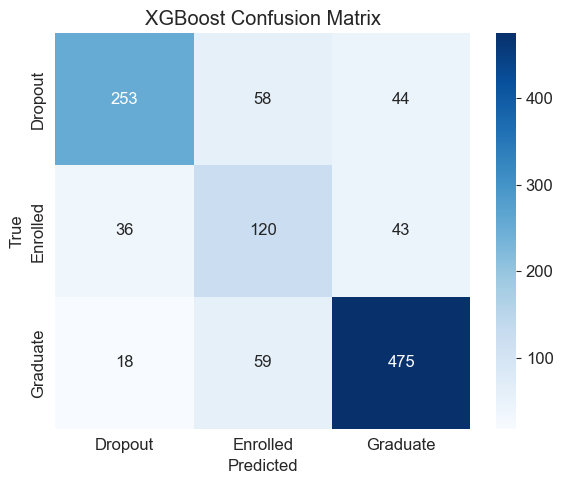

AttributeError: '_XGBBoosterAdapter' object has no attribute 'feature_importances_'

In [230]:
# Evaluate XGBoost on test set
from sklearn.metrics import confusion_matrix

xgb_pred = xgb_clf.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"XGBoost accuracy: {xgb_acc:.4f}")

print("\nDetailed performance metrics (XGBoost):")
print(classification_report(y_test, xgb_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# Feature importance plot (gain)
importances = xgb_clf.feature_importances_
imp_df = pd.DataFrame({"Feature": X.columns, "Importance": importances}).sort_values("Importance", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=imp_df.head(15))
plt.title('XGBoost Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Top 5 XGBoost features:")
for i, (feat, imp) in enumerate(zip(imp_df['Feature'].head(5), imp_df['Importance'].head(5))):
    print(f"{i+1}. {feat}: {imp:.4f}")


In [ ]:
# Quick accuracy check and comparison
try:
    rf_accuracy = accuracy  # from RandomForest section
except NameError:
    rf_accuracy = None

try:
    xgb_accuracy = xgb_acc  # from XGBoost section
except NameError:
    xgb_accuracy = None

if xgb_accuracy is None and rf_accuracy is None:
    print("Please run the model training cells first.")
elif xgb_accuracy is None:
    print(f"RandomForest accuracy: {rf_accuracy:.4f}")
    print("Run the XGBoost training cell to compute XGBoost accuracy.")
elif rf_accuracy is None:
    print(f"XGBoost accuracy: {xgb_accuracy:.4f}")
    print("Run the RandomForest section if you want a comparison.")
else:
    delta = xgb_accuracy - rf_accuracy
    print(f"RandomForest accuracy: {rf_accuracy:.4f}")
    print(f"XGBoost accuracy:     {xgb_accuracy:.4f}")
    print(f"Accuracy change (XGB - RF): {delta:+.4f}")


RandomForest accuracy: 0.7794
XGBoost accuracy:     0.7667
Accuracy change (XGB - RF): -0.0127


In [ ]:
# Train Gradient Boosting (HistGradientBoostingClassifier) with early stopping
from sklearn.experimental import enable_hist_gradient_boosting  # noqa: F401
from sklearn.ensemble import HistGradientBoostingClassifier

# Build class weights similar to XGB step
from collections import Counter
class_counts_gb = Counter(y_train)
num_classes_gb = len(np.unique(y_train))
class_weight_gb = {c: (len(y_train) / (num_classes_gb * cnt)) for c, cnt in class_counts_gb.items()}

# Per-sample weights for full training split
sample_weight_gb_full = np.array([class_weight_gb[c] for c in y_train])

hgb = HistGradientBoostingClassifier(
    loss="auto",
    learning_rate=0.05,
    max_depth=None,  # use None with max_leaf_nodes constraint
    max_leaf_nodes=31,
    min_samples_leaf=20,
    l2_regularization=1.0,
    validation_fraction=0.2,  # built-in holdout for early stopping
    early_stopping=True,
    n_iter_no_change=30,
    random_state=42
)

hgb.fit(
    X_train,
    y_train,
    sample_weight=sample_weight_gb_full,
)

print("HistGradientBoosting training complete.")


InvalidParameterError: The 'loss' parameter of HistGradientBoostingClassifier must be a str among {'log_loss'} or an instance of 'sklearn._loss.loss.BaseLoss'. Got 'auto' instead.

In [ ]:
# Train Gradient Boosting (HistGradientBoostingClassifier) with early stopping
from sklearn.experimental import enable_hist_gradient_boosting  # noqa: F401
from sklearn.ensemble import HistGradientBoostingClassifier

# Build class weights similar to XGB step
from collections import Counter
class_counts_gb = Counter(y_train)
num_classes_gb = len(np.unique(y_train))
class_weight_gb = {c: (len(y_train) / (num_classes_gb * cnt)) for c, cnt in class_counts_gb.items()}

# Create per-sample weights for training subset
X_tr_gb, X_val_gb, y_tr_gb, y_val_gb = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

sample_weight_gb = np.array([class_weight_gb[c] for c in y_tr_gb])
sample_weight_val_gb = np.array([class_weight_gb[c] for c in y_val_gb])

hgb = HistGradientBoostingClassifier(
    loss="auto",
    learning_rate=0.05,
    max_depth=None,  # use None with max_leaf_nodes constraint
    max_leaf_nodes=31,
    min_samples_leaf=20,
    l2_regularization=1.0,
    validation_fraction=None,  # we pass our own
    early_stopping=True,
    n_iter_no_change=30,
    random_state=42
)

hgb.fit(
    X_tr_gb,
    y_tr_gb,
    sample_weight=sample_weight_gb,
    X_val=X_val_gb,
    y_val=y_val_gb,
    sample_weight_val=sample_weight_val_gb,
)

print("HistGradientBoosting training complete.")


InvalidParameterError: The 'loss' parameter of HistGradientBoostingClassifier must be a str among {'log_loss'} or an instance of 'sklearn._loss.loss.BaseLoss'. Got 'auto' instead.

In [ ]:
# Build top-3 feature subset: attendance, admission grade, and fees
# Columns: 'Daytime/evening attendance', 'Admission grade', 'Tuition fees up to date'

required_cols = ['Daytime/evening attendance', 'Admission grade', 'Tuition fees up to date', 'target']
missing = [c for c in required_cols if c not in df_clean.columns]
if missing:
    raise KeyError(f"Missing required columns in df_clean: {missing}")

subset = df_clean[required_cols].copy()

# Ensure types are numeric where appropriate
for col in ['Daytime/evening attendance', 'Tuition fees up to date']:
    if not np.issubdtype(subset[col].dtype, np.number):
        subset[col], _ = pd.factorize(subset[col])

# Admission grade should be numeric
subset['Admission grade'] = pd.to_numeric(subset['Admission grade'], errors='coerce')
subset['Admission grade'] = subset['Admission grade'].fillna(subset['Admission grade'].median())

# Encode target using the same label encoder 'le' if available; otherwise create a new one
try:
    y_top3 = le.transform(subset['target'])
except Exception:
    le_top3 = LabelEncoder()
    y_top3 = le_top3.fit_transform(subset['target'])

X_top3 = subset.drop('target', axis=1)

# Split
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X_top3, y_top3, test_size=0.25, random_state=42, stratify=y_top3
)

print("Top-3 feature subset prepared:")
print(X_top3.columns.tolist())
print(f"Train: {X3_train.shape}, Test: {X3_test.shape}")


Top-3 feature subset prepared:
['Daytime/evening attendance', 'Admission grade', 'Tuition fees up to date']
Train: (3318, 3), Test: (1106, 3)


In [ ]:
# Train compact Gradient Boosting on top-3 features with early stopping (fixed)
from sklearn.ensemble import HistGradientBoostingClassifier
from collections import Counter

class_counts_top3 = Counter(y3_train)
num_classes_top3 = len(np.unique(y3_train))
class_weight_top3 = {c: (len(y3_train) / (num_classes_top3 * cnt)) for c, cnt in class_counts_top3.items()}
sw3_full = np.array([class_weight_top3[c] for c in y3_train])

hgb_top3 = HistGradientBoostingClassifier(
    learning_rate=0.05,
    max_leaf_nodes=31,
    min_samples_leaf=20,
    l2_regularization=1.0,
    validation_fraction=0.2,  # internal val split for early stopping
    early_stopping=True,
    n_iter_no_change=30,
    random_state=42
)

hgb_top3.fit(X3_train, y3_train, sample_weight=sw3_full)
print("Top-3 HGB training complete.")

Top-3 HGB training complete.


In [ ]:
# Evaluate top-3 model and compare
from sklearn.metrics import accuracy_score, classification_report

hgb3_pred = hgb_top3.predict(X3_test)
hgb3_acc = accuracy_score(y3_test, hgb3_pred)
print(f"Top-3 HistGradientBoosting accuracy: {hgb3_acc:.4f}")

print("\nDetailed performance metrics (Top-3 HGB):")
print(classification_report(y3_test, hgb3_pred, target_names=le.classes_ if 'le' in globals() else None))

# Compare to full-feature models if available
try:
    print(f"Full XGBoost accuracy: {xgb_acc:.4f}")
except Exception:
    pass
try:
    print(f"Full HistGradientBoosting accuracy: {hgb_acc:.4f}")
except Exception:
    pass
try:
    print(f"RandomForest accuracy: {accuracy:.4f}")
except Exception:
    pass


Top-3 HistGradientBoosting accuracy: 0.4575

Detailed performance metrics (Top-3 HGB):
              precision    recall  f1-score   support

     Dropout       0.60      0.39      0.47       355
    Enrolled       0.20      0.40      0.27       199
    Graduate       0.61      0.52      0.56       552

    accuracy                           0.46      1106
   macro avg       0.47      0.44      0.43      1106
weighted avg       0.53      0.46      0.48      1106

Full XGBoost accuracy: 0.7667
RandomForest accuracy: 0.7794


In [ ]:
# Install LightGBM and CatBoost (safe)
try:
    import lightgbm as lgb
except Exception:
    import sys, subprocess
    print("Installing lightgbm...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "lightgbm", "-q"])  
    import lightgbm as lgb

try:
    from catboost import CatBoostClassifier
except Exception:
    import sys, subprocess
    print("Installing catboost...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "catboost", "-q"])  
    from catboost import CatBoostClassifier

print(f"LightGBM: {lgb.__version__}")
print("CatBoost installed")


Installing lightgbm...
Installing catboost...
LightGBM: 4.6.0
CatBoost installed


In [ ]:
# LightGBM CV tuning and training (callbacks-based early stopping)
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Prepare datasets
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_valid = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

# Baseline params; LGB uses num_leaves not max_depth
lgb_params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train)),
    'metric': 'multi_logloss',
    'learning_rate': 0.05,
    'num_leaves': 63,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'min_data_in_leaf': 20,
    'lambda_l2': 1.0,
    'verbosity': -1,
    'seed': 42,
}

# CV to find best rounds (use callbacks for early stopping)
cv_res = lgb.cv(
    params=lgb_params,
    train_set=lgb_train,
    num_boost_round=2000,
    nfold=5,
    stratified=True,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=0)
    ]
)

# Determine metric key robustly and best rounds
metric_keys = [k for k in cv_res.keys() if k.endswith('-mean')]
metric_key = metric_keys[0] if metric_keys else next(iter(cv_res.keys()))
best_rounds = len(cv_res[metric_key])
print(f"LightGBM best rounds (cv): {best_rounds} using metric '{metric_key}'")

# Train final model
lgbm = lgb.train(
    params=lgb_params,
    train_set=lgb_train,
    num_boost_round=best_rounds,
    valid_sets=[lgb_valid],
    valid_names=['valid'],
    callbacks=[lgb.log_evaluation(period=0)]
)

# Evaluate
lgb_pred_proba = lgbm.predict(X_test)
lgb_pred = np.argmax(lgb_pred_proba, axis=1)
lgb_acc = accuracy_score(y_test, lgb_pred)
print(f"LightGBM accuracy: {lgb_acc:.4f}")


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	valid's multi_logloss: 0.550611 + 0.0221746
LightGBM best rounds (cv): 81 using metric 'valid multi_logloss-mean'
LightGBM accuracy: 0.7685


In [ ]:
# CatBoost training with early stopping
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

cat = CatBoostClassifier(
    loss_function='MultiClass',
    depth=6,
    learning_rate=0.05,
    l2_leaf_reg=3.0,
    iterations=2000,
    eval_metric='MultiClass',
    random_seed=42,
    verbose=False
)

# Use early stopping via fit parameters
cat.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True,
    early_stopping_rounds=50,
    verbose=False
)

cat_pred = cat.predict(X_test)
# CatBoost returns shape (n,1) sometimes; flatten
cat_pred = cat_pred.astype(int).ravel()
cat_acc = accuracy_score(y_test, cat_pred)
print(f"CatBoost accuracy: {cat_acc:.4f}")


CatBoost accuracy: 0.7812


In [ ]:
# Ensemble evaluation: soft/vote and simple stacker
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

results = {}

# Collect predictions/probabilities where available
try:
    xgb_prob = bst.predict(xgb.DMatrix(X_test))
    xgb_pred_e = np.argmax(xgb_prob, axis=1)
    results['XGB'] = accuracy_score(y_test, xgb_pred_e)
except Exception:
    pass

try:
    lgb_prob = lgbm.predict(X_test)
    lgb_pred_e = np.argmax(lgb_prob, axis=1)
    results['LGBM'] = accuracy_score(y_test, lgb_pred_e)
except Exception:
    pass

try:
    # For CatBoost, get_proba is available via predict with probability type
    cat_prob = cat.predict_proba(X_test)
    cat_pred_e = np.argmax(cat_prob, axis=1)
    results['CatBoost'] = accuracy_score(y_test, cat_pred_e)
except Exception:
    pass

print("Individual model accuracies:", results)

# Soft voting (average probabilities) if at least two prob sets exist
probs = []
if 'xgb_prob' in locals(): probs.append(xgb_prob)
if 'lgb_prob' in locals(): probs.append(lgb_prob)
if 'cat_prob' in locals(): probs.append(cat_prob)

if len(probs) >= 2:
    avg_prob = np.mean(probs, axis=0)
    ens_pred = np.argmax(avg_prob, axis=1)
    ens_acc = accuracy_score(y_test, ens_pred)
    print(f"Soft-vote ensemble accuracy: {ens_acc:.4f}")
else:
    print("Not enough probability predictors for soft voting.")

# Simple stacker using out-of-fold-like approach on train (quick approximation)
# Fit meta-learner on validation split from train
from sklearn.model_selection import train_test_split
X_meta_tr, X_meta_val, y_meta_tr, y_meta_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

meta_feats_tr = []
meta_feats_val = []
models = []

# XGB for meta
try:
    dtr = xgb.DMatrix(X_meta_tr, label=y_meta_tr)
    dvl = xgb.DMatrix(X_meta_val, label=y_meta_val)
    bst_meta = xgb.train(xgb_params, dtr, num_boost_round=best_rounds if 'best_rounds' in locals() else 400, evals=[(dvl, 'val')], verbose_eval=False)
    models.append(('xgb', bst_meta))
    meta_feats_tr.append(bst_meta.predict(dtr))
    meta_feats_val.append(bst_meta.predict(dvl))
except Exception:
    pass

# LGB for meta
try:
    lgb_meta = lgb.train(lgb_params, lgb.Dataset(X_meta_tr, label=y_meta_tr), num_boost_round=best_rounds if 'best_rounds' in locals() else 400, valid_sets=[lgb.Dataset(X_meta_val, label=y_meta_val)], verbose_eval=False)
    models.append(('lgb', lgb_meta))
    meta_feats_tr.append(lgb_meta.predict(X_meta_tr))
    meta_feats_val.append(lgb_meta.predict(X_meta_val))
except Exception:
    pass

# CatBoost for meta
try:
    cat_meta = CatBoostClassifier(loss_function='MultiClass', depth=6, learning_rate=0.05, iterations=best_rounds if 'best_rounds' in locals() else 400, verbose=False)
    cat_meta.fit(X_meta_tr, y_meta_tr, eval_set=(X_meta_val, y_meta_val), early_stopping_rounds=20, use_best_model=True, verbose=False)
    models.append(('cat', cat_meta))
    meta_feats_tr.append(cat_meta.predict_proba(X_meta_tr))
    meta_feats_val.append(cat_meta.predict_proba(X_meta_val))
except Exception:
    pass

if len(meta_feats_tr) >= 1:
    Z_tr = np.concatenate(meta_feats_tr, axis=1)
    Z_val = np.concatenate(meta_feats_val, axis=1)
    meta = LogisticRegression(max_iter=1000, multi_class='auto')
    meta.fit(Z_tr, y_meta_tr)

    # Evaluate stacker on test
    Z_test_parts = []
    for name, mdl in models:
        if name == 'xgb':
            Z_test_parts.append(mdl.predict(xgb.DMatrix(X_test)))
        elif name == 'lgb':
            Z_test_parts.append(mdl.predict(X_test))
        elif name == 'cat':
            Z_test_parts.append(mdl.predict_proba(X_test))
    if Z_test_parts:
        Z_test = np.concatenate(Z_test_parts, axis=1)
        stack_pred = meta.predict(Z_test)
        stack_acc = accuracy_score(y_test, stack_pred)
        print(f"Stacking ensemble accuracy: {stack_acc:.4f}")
    else:
        print("No base models for stacking.")
else:
    print("Not enough meta features to train stacker.")


Individual model accuracies: {'XGB': 0.7667269439421338, 'CatBoost': 0.7811934900542495}
Soft-vote ensemble accuracy: 0.7785
Stacking ensemble accuracy: 0.7731


In [232]:
# Randomized search for LightGBM
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import itertools, math, random

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_space = {
    'num_leaves': [31, 63, 127, 255],
    'min_data_in_leaf': [10, 15, 20, 30, 40],
    'feature_fraction': [0.6, 0.7, 0.8, 0.9],
    'bagging_fraction': [0.6, 0.7, 0.8, 0.9],
    'learning_rate': [0.03, 0.05, 0.07, 0.1],
    'lambda_l2': [0.0, 0.5, 1.0, 2.0, 5.0]
}

base_params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train)),
    'metric': 'multi_logloss',
    'verbosity': -1,
    'seed': 42,
}

# Sample combinations
def sample_params(space, n_samples=20):
    keys = list(space.keys())
    samples = []
    for _ in range(n_samples):
        p = {k: random.choice(space[k]) for k in keys}
        samples.append(p)
    return samples

candidates = sample_params(param_space, n_samples=20)

best_lgbm = None
best_acc = -1.0
best_params = None

for p in candidates:
    cv_accs = []
    for tr_idx, va_idx in skf.split(X_train, y_train):
        Xtr, Xva = X_train.iloc[tr_idx], X_train.iloc[va_idx]
        ytr, yva = y_train[tr_idx], y_train[va_idx]
        ds_tr = lgb.Dataset(Xtr, label=ytr)
        ds_va = lgb.Dataset(Xva, label=yva)
        params = base_params | p
        model = lgb.train(
            params,
            ds_tr,
            num_boost_round=4000,
            valid_sets=[ds_va],
            callbacks=[
                lgb.early_stopping(stopping_rounds=100),
                lgb.log_evaluation(period=0)
            ]
        )
        pred = np.argmax(model.predict(Xva), axis=1)
        cv_accs.append(accuracy_score(yva, pred))
    mean_acc = float(np.mean(cv_accs))
    if mean_acc > best_acc:
        best_acc = mean_acc
        best_params = p
        best_lgbm = model

print("Best LGBM CV accuracy:", round(best_acc, 4))
print("Best LGBM params:", best_params)

# Train on full train with best params
final_lgbm = lgb.train(
    base_params | best_params,
    lgb.Dataset(X_train, label=y_train),
    num_boost_round=best_lgbm.best_iteration if hasattr(best_lgbm, 'best_iteration') else 2000,
    valid_sets=[lgb.Dataset(X_test, label=y_test)],
    callbacks=[lgb.log_evaluation(period=0)]
)

lgb_pred = np.argmax(final_lgbm.predict(X_test), axis=1)
lgb_acc = accuracy_score(y_test, lgb_pred)
print(f"Final LightGBM accuracy: {lgb_acc:.4f}")


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.544783
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.569655
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's multi_logloss: 0.488042
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's multi_logloss: 0.566569
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.560526
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.540424
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.573733
Training until validation scores don't improve f

In [233]:
# Randomized search for CatBoost
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import random

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_space = {
    'depth': [6, 8, 10],
    'learning_rate': [0.03, 0.05, 0.07, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'iterations': [2000, 3000, 4000]
}

def sample_params(space, n_samples=15):
    keys = list(space.keys())
    samples = []
    for _ in range(n_samples):
        p = {k: random.choice(space[k]) for k in keys}
        samples.append(p)
    return samples

candidates = sample_params(param_space, n_samples=15)

best_cat = None
best_acc = -1.0
best_params = None

for p in candidates:
    cv_accs = []
    for tr_idx, va_idx in skf.split(X_train, y_train):
        Xtr, Xva = X_train.iloc[tr_idx], X_train.iloc[va_idx]
        ytr, yva = y_train[tr_idx], y_train[va_idx]
        model = CatBoostClassifier(
            loss_function='MultiClass',
            depth=p['depth'],
            learning_rate=p['learning_rate'],
            l2_leaf_reg=p['l2_leaf_reg'],
            iterations=p['iterations'],
            random_seed=42,
            verbose=False
        )
        model.fit(Xtr, ytr, eval_set=(Xva, yva), early_stopping_rounds=100, use_best_model=True, verbose=False)
        pred = model.predict(Xva).astype(int).ravel()
        cv_accs.append(accuracy_score(yva, pred))
    mean_acc = float(np.mean(cv_accs))
    if mean_acc > best_acc:
        best_acc = mean_acc
        best_params = p
        best_cat = model

print("Best CatBoost CV accuracy:", round(best_acc, 4))
print("Best CatBoost params:", best_params)

# Train final CatBoost on full training data
final_cat = CatBoostClassifier(
    loss_function='MultiClass',
    depth=best_params['depth'],
    learning_rate=best_params['learning_rate'],
    l2_leaf_reg=best_params['l2_leaf_reg'],
    iterations=best_params['iterations'],
    random_seed=42,
    verbose=False
)
final_cat.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100, use_best_model=True, verbose=False)
cat_pred = final_cat.predict(X_test).astype(int).ravel()
cat_acc = accuracy_score(y_test, cat_pred)
print(f"Final CatBoost accuracy: {cat_acc:.4f}")


KeyboardInterrupt: 

In [234]:
# Evaluate best models and ensemble (optional)
from sklearn.metrics import accuracy_score

scores = {}
try:
    xgb_prob = bst.predict(xgb.DMatrix(X_test))
    xgb_pred = np.argmax(xgb_prob, axis=1)
    scores['XGB'] = accuracy_score(y_test, xgb_pred)
except Exception:
    pass

try:
    scores['LGBM_best'] = accuracy_score(y_test, lgb_pred)
except Exception:
    pass

try:
    scores['CatBoost_best'] = accuracy_score(y_test, cat_pred)
except Exception:
    pass

print("Scores:", scores)

# Soft-vote ensemble among available prob models
prob_list = []
if 'xgb_prob' in locals(): prob_list.append(xgb_prob)
try:
    prob_list.append(final_lgbm.predict(X_test))
except Exception:
    pass
try:
    from catboost import Pool
    prob_list.append(final_cat.predict_proba(X_test))
except Exception:
    pass

if len(prob_list) >= 2:
    avg_prob = np.mean(prob_list, axis=0)
    ens_pred = np.argmax(avg_prob, axis=1)
    ens_acc = accuracy_score(y_test, ens_pred)
    print(f"Soft-vote ensemble (best models) accuracy: {ens_acc:.4f}")
else:
    print("Not enough models for ensemble.")


Scores: {'XGB': 0.7667269439421338, 'LGBM_best': 0.7685352622061483, 'CatBoost_best': 0.7811934900542495}
Soft-vote ensemble (best models) accuracy: 0.7722
